In [1]:
import pandas as pd
import datetime
FullData = pd.read_csv('Untitled Folder/FullDataSetGlassdoor')

In [2]:
import os
import datetime
os.chdir('..')
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint

/home/aaird1/.local/lib/python3.6/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to /home/aaird1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
FullData['date'] = pd.to_datetime(FullData['date']) 

precovid = FullData[FullData['date'].dt.date < datetime.date(2020,3,1)]
precovid = precovid[precovid['date'].dt.date > datetime.date(2019,3,1)]

postcovid = FullData[FullData['date'].dt.date > datetime.date(2020,3,31)]
postcovid = postcovid[postcovid['date'].dt.date < datetime.date(2021,3,31)]

In [5]:
len(postcovid)

134269

In [13]:
precovidWFH1 = precovid.dropna(subset = ['Pros', 'Cons'])
postcovidWFH1 = postcovid.dropna(subset = ['Pros', 'Cons'])

precovidWFHpro = precovidWFH1.loc[precovidWFH1['Pros'].str.contains("WFH | work from home | remote| working from home", case=False)]
postcovidWFHpro = postcovidWFH1.loc[postcovidWFH1['Pros'].str.contains("WFH | work from home | remote", case=False)]

precovidWFHcon = precovidWFH1.loc[precovidWFH1['Cons'].str.contains("WFH | work from home | remote| working from home", case=False)]
postcovidWFHcon = postcovidWFH1.loc[postcovidWFH1['Cons'].str.contains("WFH | work from home | remote", case=False)]

precovidWFHconnot = precovidWFH1.loc[precovidWFH1['Cons'].str.contains(" can't WFH |no work from home | not remote| 't working from home | 't work from home'", case=False)]
postcovidWFHconnot = postcovidWFH1.loc[postcovidWFH1['Cons'].str.contains("can't WFH |no work from home | not remote | no working from home |'t work from home'", case=False)]

In [8]:
len(precovidWFHcon)


730

In [10]:
len(postcovidWFHcon)


982

In [14]:
len(precovidWFHconnot)


72

In [12]:
len(postcovidWFHconnot)

54

In [5]:
WFHpros = pd.concat([precovidWFHpro, postcovidWFHpro], axis=0)
WFHcons = pd.concat([precovidWFHcon, postcovidWFHcon], axis=0)
AllReviews = pd.concat([precovid, postcovid], axis=0)

In [6]:
WFHpros = WFHpros.drop(columns=['Unnamed: 0','Summary','OverallRating', 'Cons', 'Helpful','date','Position','City','State','Status','Tenure'], axis=1)


In [6]:
# Load the regular expression library
import re

# Remove punctuation
WFHpros['pros_processed'] = \
WFHpros['Pros'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
WFHpros['pros_processed'] = \
WFHpros['pros_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
WFHpros['pros_processed'].head()

612     unlimited pto (but strings attached to take it...
688     great coworker awesome perks very flexible whe...
2231    work on latest technologies  bangalore employe...
2258    work to life balance is the main pro- trust ba...
2267    - working with some very smart people (interne...
Name: pros_processed, dtype: object

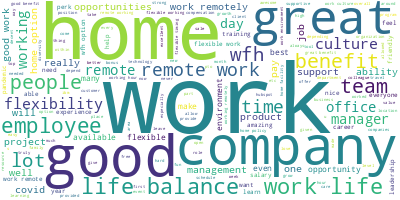

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(WFHpros['pros_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [9]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'work', 'from', 'home', 'wfh', 'remote'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = WFHpros.pros_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

/home/aaird1/.local/lib/python3.6/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to /home/aaird1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['unlimited', 'pto', 'strings', 'attached', 'take', 'stock', 'options', 'adobe', 'takes', 'taxes', 'stock', 'credits', 'ability', 'wednesdays', 'taken', 'away', 'management', 'discretion', 'co', 'workers', 'intelligent', 'great', 'denver', 'office', 'parking', 'commuter', 'benefits', 'office', 'th', 'california']


In [10]:

import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [11]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"great" + 0.015*"company" + 0.011*"benefits" + 0.009*"culture" + '
  '0.008*"good" + 0.008*"balance" + 0.008*"people" + 0.007*"life" + '
  '0.007*"office" + 0.006*"flexible"'),
 (1,
  '0.017*"good" + 0.016*"great" + 0.013*"culture" + 0.013*"people" + '
  '0.011*"company" + 0.011*"working" + 0.011*"team" + 0.009*"flexibility" + '
  '0.009*"flexible" + 0.008*"benefits"'),
 (2,
  '0.015*"good" + 0.013*"life" + 0.012*"team" + 0.010*"employees" + '
  '0.010*"balance" + 0.009*"company" + 0.008*"flexibility" + 0.008*"working" + '
  '0.007*"time" + 0.006*"employee"'),
 (3,
  '0.019*"good" + 0.014*"benefits" + 0.012*"company" + 0.012*"great" + '
  '0.012*"life" + 0.011*"flexibility" + 0.010*"balance" + 0.009*"culture" + '
  '0.009*"working" + 0.008*"team"'),
 (4,
  '0.025*"great" + 0.024*"working" + 0.021*"good" + 0.012*"life" + '
  '0.012*"balance" + 0.009*"company" + 0.009*"remotely" + 0.009*"covid" + '
  '0.008*"benefits" + 0.008*"new"'),
 (5,
  '0.052*"good" + 0.028*"flexible"

In [12]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

#LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
   # with open(LDAvis_data_filepath, 'wb') as f:
    #    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath, 'rb') as f:
 #   LDAvis_prepared = pickle.load(f)

#pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.048243  0.025329       1        1  14.806766
8     -0.017254  0.016654       2        1  14.770411
7      0.001908  0.011463       3        1  13.353774
6      0.000288  0.015956       4        1  13.253975
4      0.005354  0.011327       5        1  10.157832
1     -0.007163  0.003606       6        1   9.897979
0     -0.044282  0.013286       7        1   8.606080
2     -0.029872 -0.053098       8        1   6.104071
3      0.000017  0.002102       9        1   5.035984
9      0.042761 -0.046625      10        1   4.013127, topic_info=            Term         Freq        Total Category  logprob  loglift
113         good  1460.000000  1460.000000  Default  30.0000  30.0000
132      working   788.000000   788.000000  Default  29.0000  29.0000
136  flexibility   447.000000   447.000000  Default  28.0000  28.0000
19         great  1126.000000  1126.000000  Default  27.0000  27.0000
66      remotely   390.000000   390.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
120      manager     8.819268   175.579461  Topic10  -5.6844   0.2244
293         many     8.366439   167.620712  Topic10  -5.7371   0.2181
144  environment     9.614879   325.399382  Topic10  -5.5980  -0.3061
143      culture    10.271006   576.721353  Topic10  -5.5320  -0.8124
112          get     8.415225   268.967980  Topic10  -5.7313  -0.2490

[848 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.131563  ability
0         2  0.175417  ability
0         3  0.268608  ability
0         4  0.071263  ability
0         5  0.087709  ability
...     ...       ...      ...
2794      2  0.484587    zynga
2794      3  0.096917    zynga
2794      4  0.096917    zynga
2794      5  0.096917    zynga
2794      6  0.096917    zynga

[2172 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 9, 8, 7, 5, 2, 1, 3, 4, 10])

#  cons

In [33]:
precovidWFHcon.head()

,Pros
646,"A lot of companies expect you to just sit, put..."
650,"Good benefits, good work/life balanace"
687,- Really smart coworkers\r\n- Good pay and ben...
2294,"In the right team, ideas spread and get realiz..."
2298,"Generally surrounded by good, honest, hardwork..."


<>:7: DeprecationWarning: invalid escape sequence \.
<>:7: DeprecationWarning: invalid escape sequence \.
<>:7: DeprecationWarning: invalid escape sequence \.
<ipython-input-13-76c49d52691e>:7: DeprecationWarning: invalid escape sequence \.
  WFHcons['Cons'].map(lambda x: re.sub('[,\.!?]', '', x))


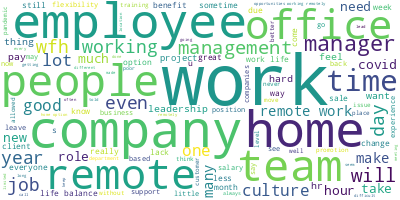

In [13]:
WFHcons = WFHcons.drop(columns=['Unnamed: 0','Summary','OverallRating', 'Pros', 'Helpful','date','Position','City','State','Status','Tenure'], axis=1)
# Load the regular expression library
import re

# Remove punctuation
WFHcons['cons_processed'] = \
WFHcons['Cons'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
WFHcons['cons_processed'] = \
WFHcons['cons_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
WFHcons['cons_processed'].head()

# Join the different processed titles together.
long_string = ','.join(list(WFHcons['cons_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [22]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'work', 'from', 'home', 'wfh', 'remote'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = WFHcons.cons_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[nltk_data] Downloading package stopwords to /home/aaird1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['option', 'would', 'nice', 'also', 'understand', 'want', 'people', 'office', 'hard', 'foster', 'culture', 'employees']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]
[(0,
  '0.013*"company" + 0.007*"sales" + 0.007*"like" + 0.006*"people" + '
  '0.006*"team" + 0.006*"employees" + 0.006*"even" + 0.006*"working" + '
  '0.005*"management" + 0.004*"time"'),
 (1,
  '0.013*"company" + 0.010*"people" + 0.009*"working" + 0.007*"job" + '
  '0.007*"time" + 0.007*"team" + 0.006*"office" + 0.006*"management" + '
  '0.005*"employees" + 0.004*"get"'),
 (2,
  '0.009*"time" + 0.008*"employees" + 0.007*"team" + 0.007*"people" + '
  '0.007*"company" + 0.006*"office" + 0.005*"working" + 0.005*"culture" + '
  '0.005*"remotely" + 0.004*"day"'),
 (3,
  '0.010*"people" + 0.010*"management" + 0.009*"working" + 0.008*"company" + '
  '0.008*"get" + 0.008*"employees" + 0.008*"team" + 0.007*"remotely" + '
  '0.006*"job" + 0.006*"office"'),
 (4,
  '0.010*"company

In [27]:
# Visualize the topics
pyLDAvis.enable_notebook()

#LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
   # with open(LDAvis_data_filepath, 'wb') as f:
    #    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath, 'rb') as f:
 #   LDAvis_prepared = pickle.load(f)

#pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.022773  0.006811       1        1  14.781068
4      0.000093  0.012715       2        1  11.944224
3      0.026412  0.010904       3        1  10.776205
2     -0.022373 -0.033192       4        1  10.465839
8      0.008470 -0.030896       5        1   9.989072
5      0.015873  0.013976       6        1   9.631945
1     -0.036069  0.014687       7        1   9.026835
9      0.012902  0.020818       8        1   8.818740
7      0.026455 -0.020255       9        1   7.511426
0     -0.008991  0.004431      10        1   7.054647, topic_info=            Term        Freq       Total Category  logprob  loglift
6         office  294.000000  294.000000  Default  30.0000  30.0000
2      employees  360.000000  360.000000  Default  29.0000  29.0000
426      manager  157.000000  157.000000  Default  28.0000  28.0000
128   management  380.000000  380.000000  Default  27.0000  27.0000
175         good  197.000000  197.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
216         team   14.998310  290.851642  Topic10  -5.4920  -0.3134
455          one   12.013985  184.608418  Topic10  -5.7139  -0.0807
741         lack    9.234138  100.757834  Topic10  -5.9770   0.2617
476       policy    9.636414  117.338143  Topic10  -5.9344   0.1520
5184       covid   10.114232  165.077485  Topic10  -5.8860  -0.1410

[868 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
5225      1  0.510847       abilities
5501      9  0.617108  accommodations
3961     10  0.636674      accounting
5494      4  0.576696      accumulate
1776      3  0.369086       acquiring
...     ...       ...             ...
599       6  0.090598           years
599       7  0.051770           years
599       8  0.064713           years
599       9  0.071184           years
599      10  0.058241           years

[2238 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 4, 3, 9, 6, 2, 10, 8, 1])

# All Reviews pros

In [ ]:
#postcovidWFHpro = postcovidWFHpro.drop(columns=['Unnamed: 0','Summary','OverallRating', 'Cons', 'Helpful','date','Position','City','State','Status','Tenure'], axis=1)
# Load the regular expression library
import re
AllReviews['Pros'] = str(AllReviews['Pros'])
# Remove punctuation
AllReviews['pros_processed'] = \
AllReviews['Pros'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
AllReviews['pros_processed'] = \
AllReviews['pros_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
AllReviews['pros_processed'].head()

# Join the different processed titles together.
long_string = ','.join(list(AllReviews['pros_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = AllReviews.pros_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

#LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
   # with open(LDAvis_data_filepath, 'wb') as f:
    #    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath, 'rb') as f:
 #   LDAvis_prepared = pickle.load(f)

#pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

# AllReviews Cons

In [ ]:

# Load the regular expression library
AllReviews['Cons'] = str(AllReviews['Cons'])

# Remove punctuation
AllReviews['cons_processed'] = \
AllReviews['Cons'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
AllReviews['cons_processed'] = \
AllReviews['cons_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
AllReviews['cons_processed'].head()

# Join the different processed titles together.
long_string = ','.join(list(AllReviews['cons_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = AllReviews.cons_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

#LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
   # with open(LDAvis_data_filepath, 'wb') as f:
    #    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath, 'rb') as f:
 #   LDAvis_prepared = pickle.load(f)

#pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared